# $t$-Test tested

In this post we shall try to run a quick experiment with the intention of convincing ourselves that $t$-test works.
We will examine what is the underlaying distribution of many different samples obtained from many different distributions.
Furthermore, we will see how the size of the sample influence the reliability of the test.

In [1]:
# Modules used
%matplotlib inline
import pylab as plt
plt.style.use('ggplot')
import pandas as pd
import numpy as np
import scipy.stats as stats

## Definitions

**Hypothesis:** a statement about a population parameter. A population may be the users' traffic and the parameter may be conversion rate.

**Objectives:** given sample taken from the population, decide whether the *null-hypothesis* ($H_0$) holds or not.

## Example

A classical example is to consider the height of a population.
The null-hypothesis, $H_0$, in this case would suggest that the mean of the distribution is $H_0$.
Ideally, we should measure the height of all members of the population, but this is going to be tricky.
Therefore, we take a sample from the population and measure the heights in the sample.
The objective of the test is to answer the following question: 

> *Does the mean of the underlaying distribution equals to $H_0$?*

So, next, we compute the mean of the sample.
At this point, we should use the statistical test and answer the question.

## Fixed hypothesis on varying populations

Let us set some parameters:

In [2]:
dx = 1.
means = np.arange(146,200+dx,dx)
sizes = [10, 50, 100, 500, 1000]
STD=20
H0=172

In this experiment we fix $H_0=${{H0}} and we apply the $t$-test on various samples obtained from different normal distributions.
For simplicity, we use fixed STD for the distribution and varying means.

Next, for each size $n$ and mean $\mu$, we generate a sample of size $n$ with mean $\mu$.
Recall, the STD is fixed.

In [3]:
np.random.seed(10)
samples = pd.DataFrame()
for size in sizes:
    # For a fixed size, genearte list of samples, one sample for each mean
    fixed_size_samples = [pd.Series(np.random.normal(loc=mean, scale=STD, size=size)) for mean in means]
    samples[str(size)] = fixed_size_samples
samples.index=means

The snippet above generates a matrix where each row has samples with the same mean and each column has samples with the same size.
The index of the `DataFrame` is the mean in use and the column name is the size of the sample.
Here are the first 3 rows:

In [4]:
samples.loc[:148] # Note that the index is the mean used!

,10,50,100,500,1000
146.0,0 172.631730 1 160.305579 2 115.09199...,0 146.094211 1 148.940679 2 136.74...,0 136.876549 1 168.284188 2 148.19...,0 119.963494 1 148.695017 2 175...,0 127.606195 1 145.544374 2 166...
147.0,0 155.660524 1 171.060747 2 127.69868...,0 158.413869 1 136.742496 2 152.51...,0 177.846774 1 162.064209 2 136.09...,0 166.033778 1 146.662981 2 159...,0 142.859633 1 104.352055 2 127...
148.0,0 108.445434 1 113.132554 2 153.32140...,0 150.522897 1 160.511639 2 147.46...,0 128.513003 1 118.104262 2 142.10...,0 159.761616 1 159.145997 2 113...,0 152.074143 1 150.470116 2 160...


Following is the histogram of the sample that has $500$ samples with mean $\mu = 163$

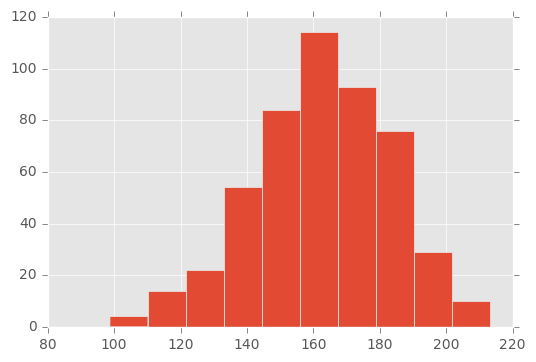

In [5]:
samples['500'].loc[163].hist();

One may guess, based on the visual observation, that the sample was obtained from a normal distribution with mean between $150$ and $170$.
Which is indeed the case, the mean was $163$.
But, how can be test it rigorously?

The answer is $t$-test.
We will iterate over all the samples, and run a $t$-test against the fixed $H_0$.

In [6]:
p_vals = samples.applymap(lambda x: stats.ttest_1samp(x, H0)[1])
p_vals.loc[:148]

,10,50,100,500,1000
146.0,0.000794,6.893325e-12,5.382195e-22,5.135664e-103,6.562808e-221
147.0,0.006270,1.246921e-08,4.854901e-21,3.431649e-98,5.551791e-198
148.0,0.091243,9.588379e-15,6.716187e-23,7.625131e-98,6.041672e-186


In the above table, each cell contains the $p$-value of the $t$-test of the corresponding sample against the fixed null-hypothesis $H_0 =$ {{H0}}.

**Reminder: What is the $p$-values?**

The $p$-value is the probability of observing the result under the assumption of $H_0$.
Recall, that a well accepted threshold for null-hypothesis rejection is $\alpha = 0.05$.
In other words, if the $p$-value is smaller than $\alpha$, we reject the null-hypothesis.
In the next step we mark with $1$ (i.e. accepted) the cases where the $p$-value was greater than $\alpha$ and with $0$ otherwise (i.e. rejected).

More intuitively, if the label is $0$, we can claim that mean of the distribution from which the sample was taken is *not* $0$.

In [7]:
accepted = p_vals.applymap(lambda p_val: 0 if p_val < 0.05 else 1)
accepted.loc[:148]

,10,50,100,500,1000
146.0,0,0,0,0,0
147.0,0,0,0,0,0
148.0,1,0,0,0,0


Let us now plot a "heat-map" of the $0-1$ matrix above:

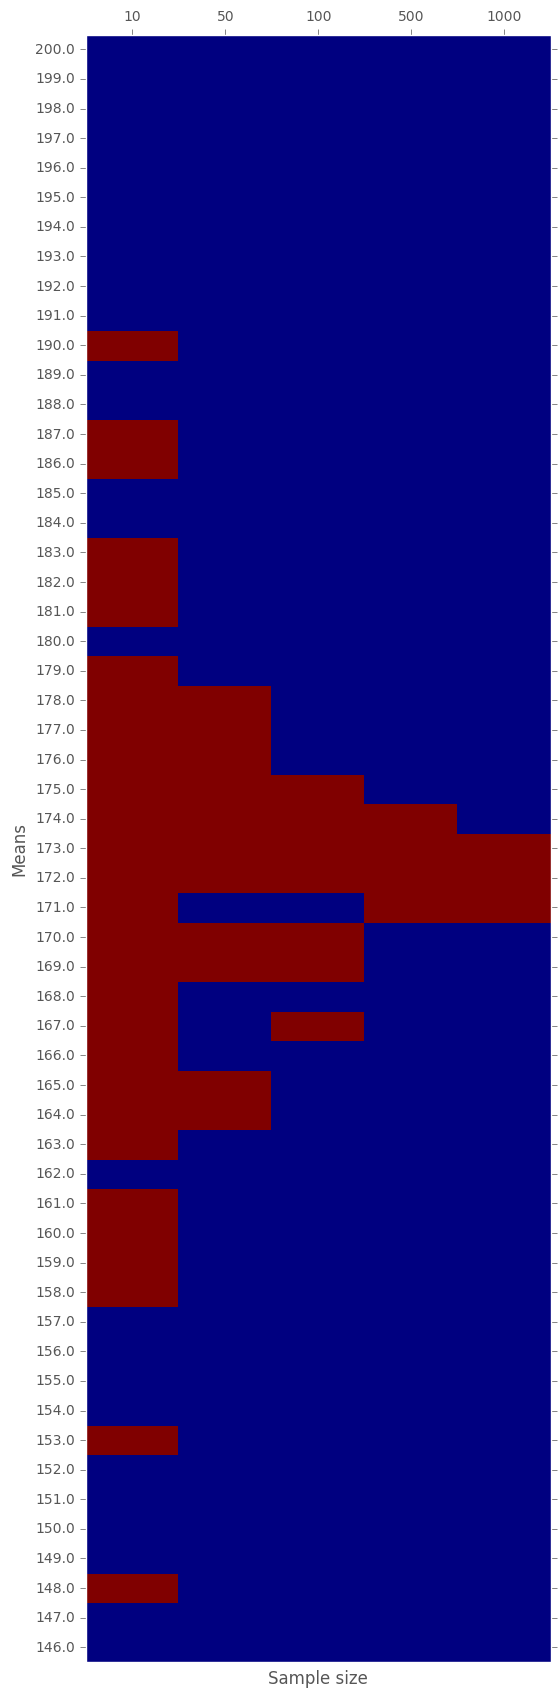

In [8]:
fig, ax = plt.subplots()
heatmap = ax.pcolormesh(accepted)

fig = plt.gcf()
fig.set_size_inches(6, 21)

plt.ylim(0,len(accepted.index))
ax.xaxis.tick_top()
ax.set_yticks(np.arange(len(accepted.index)) + 0.5, minor=False)
ax.set_yticklabels(accepted.index, minor=False)
ax.set_xticks(np.arange(len(accepted.columns)) + 0.5, minor=False)
ax.set_xticklabels(accepted.columns, minor=False)
plt.ylabel('Means')
plt.xlabel('Sample size')
ax.grid(True)

In the above graph, every red cell corresponds to a $t$-test of a sample with given size obtained from a normal distribution with given mean.

* RED: means that the null-hypothesis cannot be rejected. That is, the obtained sample is likely to be obtained given the null-hypothesis.
* BLUE: means that the null-hypothesis has to be rejected. That is, it is very unlikely that we witness the sample assuming $H_0$ holds.

We see, that the bigger the sample is, the more accurate the test is. 
Still, starting from a sample size of 50, we already manage to reject about $2/3$ of the samples.
It gets much better the denser the sample is.

In general, the smaller the sample, the more likely it is to accept the null-hypothesis even when it is wrong; see sample size of 10 and mean 148.
However, the bigger the sample, the more precises the test is; i.e. we correctly identify whether the underlying distribution has a mean equals to $H_0$ or not.

## Links

- [What a p value tells you about statistical data](http://www.dummies.com/education/math/statistics/what-a-p-value-tells-you-about-statistical-data/)
- [SciPy Stats](https://docs.scipy.org/doc/scipy-0.18.1/reference/tutorial/stats.html)
- [t-Test SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html#scipy.stats.ttest_1samp)